<a href="https://colab.research.google.com/github/vtu23260-cmd/data-visualization/blob/main/DV_Task_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/tmp/ipython-input-1047459301.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["Surge_Pricing_Type"] = df_clean["Surge_Pricing_Type"].astype(str)


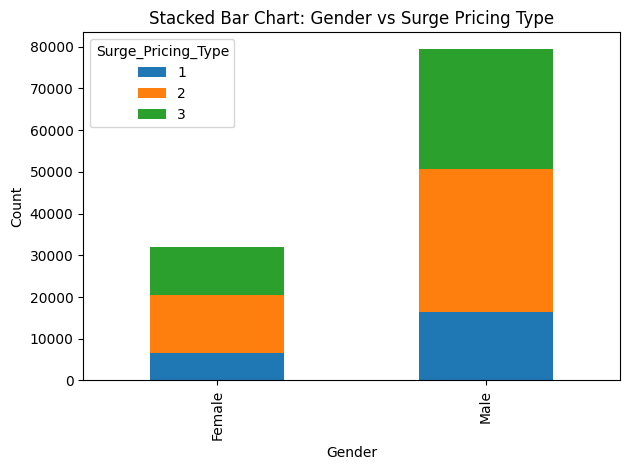

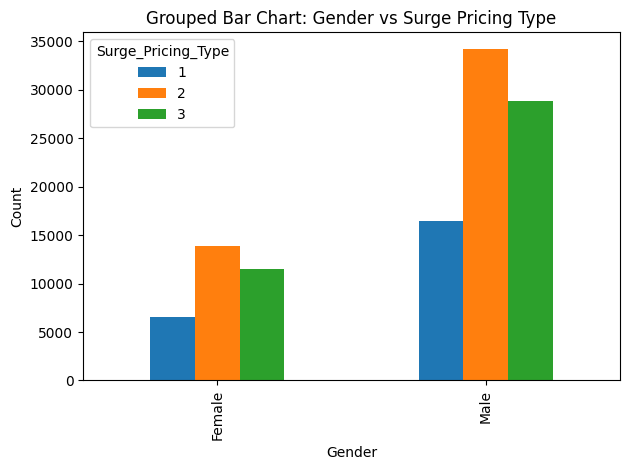

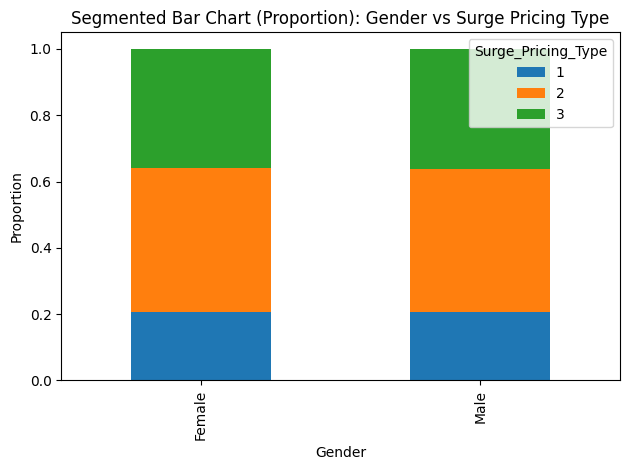

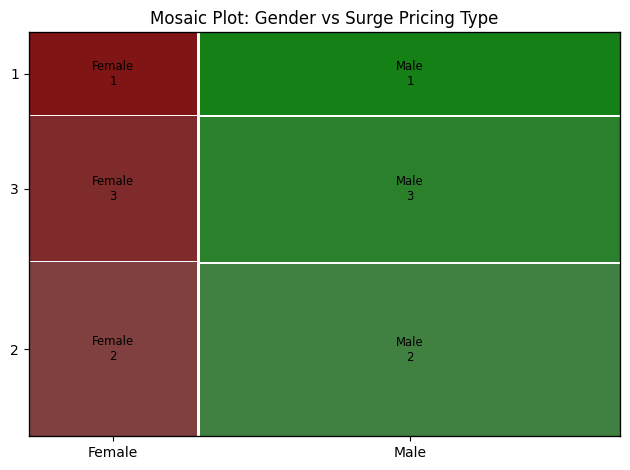

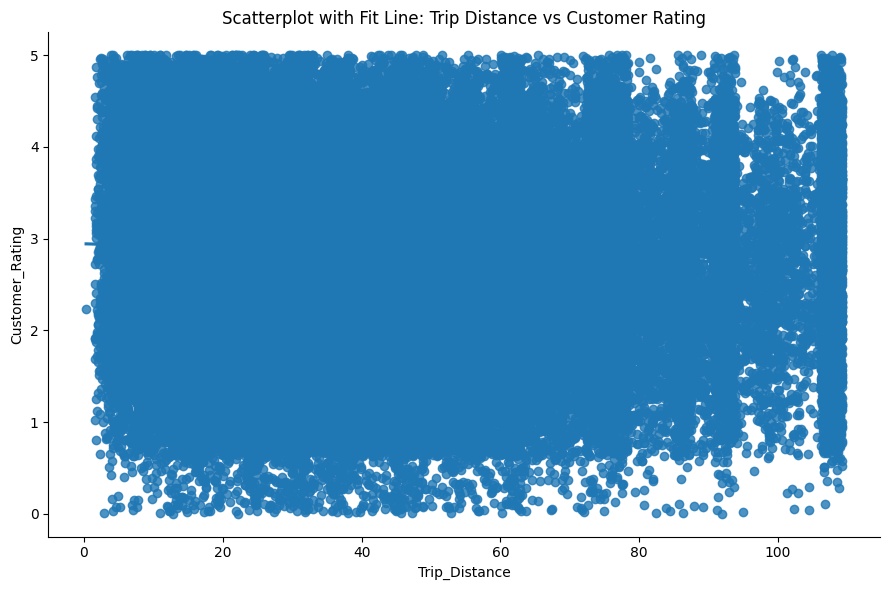

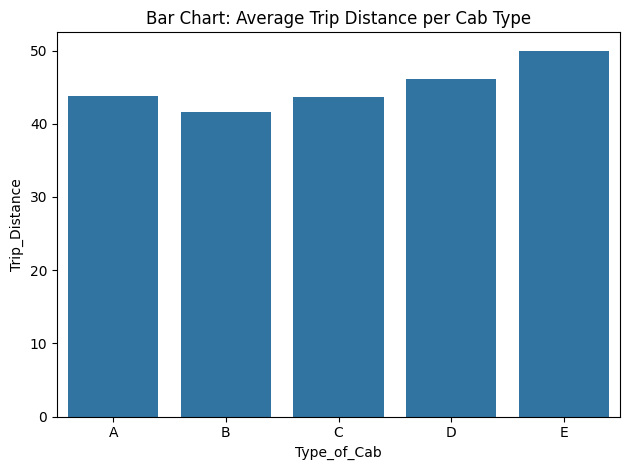

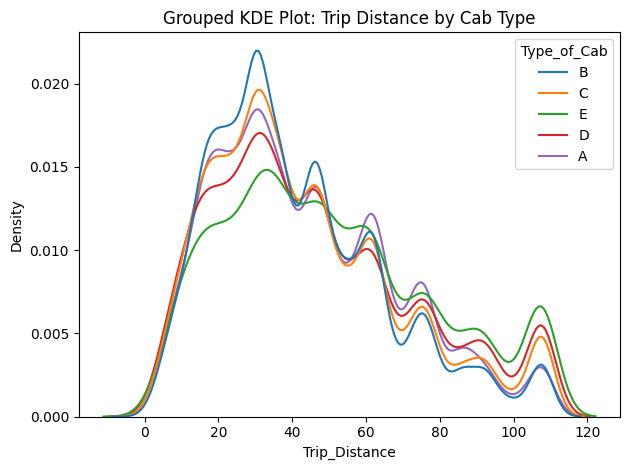

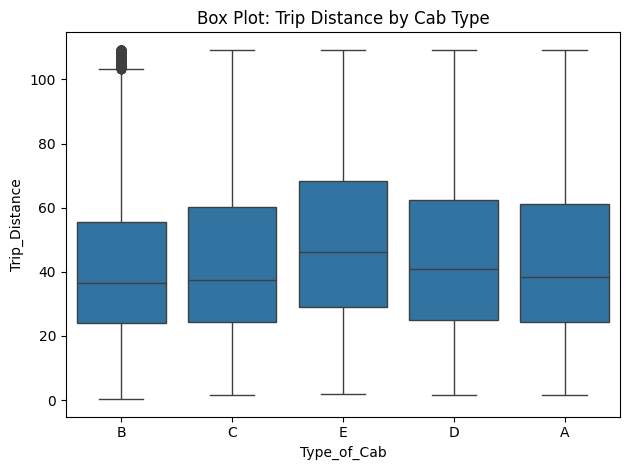

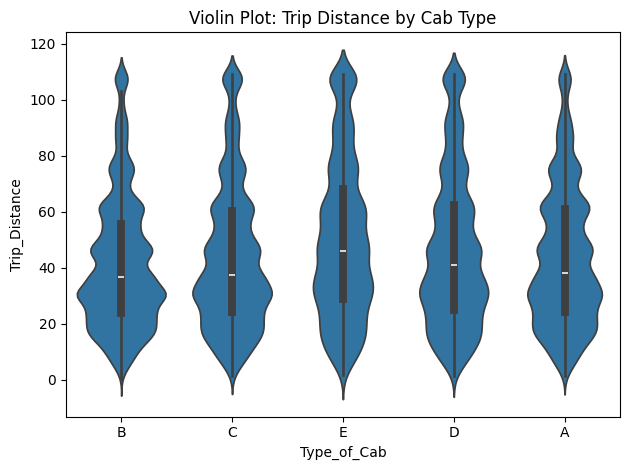

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.mosaicplot import mosaic

# Load dataset
df = pd.read_csv("/content/sigma_cabs.csv")

# Drop rows with missing values in selected columns
df_clean = df.dropna(subset=["Gender", "Surge_Pricing_Type", "Trip_Distance", "Customer_Rating", "Type_of_Cab"])

# Convert types
df_clean["Surge_Pricing_Type"] = df_clean["Surge_Pricing_Type"].astype(str)

# ------------------------------
# 1. Categorical vs Categorical
# ------------------------------

# a. Stacked Bar Chart
stacked = pd.crosstab(df_clean["Gender"], df_clean["Surge_Pricing_Type"])
stacked.plot(kind="bar", stacked=True)
plt.title("Stacked Bar Chart: Gender vs Surge Pricing Type")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# b. Grouped Bar Chart
stacked.plot(kind="bar")
plt.title("Grouped Bar Chart: Gender vs Surge Pricing Type")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# c. Segmented Bar Chart
prop_df = stacked.div(stacked.sum(1), axis=0)
prop_df.plot(kind='bar', stacked=True)
plt.title("Segmented Bar Chart (Proportion): Gender vs Surge Pricing Type")
plt.xlabel("Gender")
plt.ylabel("Proportion")
plt.tight_layout()
plt.show()

# d. Mosaic Plot
mosaic(df_clean, ['Gender', 'Surge_Pricing_Type'])
plt.title("Mosaic Plot: Gender vs Surge Pricing Type")
plt.tight_layout()
plt.show()

# ------------------------------
# 2. Continuous vs Continuous
# ------------------------------

# Scatterplot with Fit Line
sns.lmplot(data=df_clean, x="Trip_Distance", y="Customer_Rating", height=6, aspect=1.5)
plt.title("Scatterplot with Fit Line: Trip Distance vs Customer Rating")
plt.tight_layout()
plt.show()

# ------------------------------
# 3. Categorical vs Continuous
# Type_of_Cab vs Trip_Distance
# ------------------------------

# a. Bar Chart (summary mean)
mean_vals = df_clean.groupby("Type_of_Cab")["Trip_Distance"].mean().reset_index()
sns.barplot(data=mean_vals, x="Type_of_Cab", y="Trip_Distance")
plt.title("Bar Chart: Average Trip Distance per Cab Type")
plt.tight_layout()
plt.show()

# b. Grouped KDE Plot
sns.kdeplot(data=df_clean, x="Trip_Distance", hue="Type_of_Cab", common_norm=False)
plt.title("Grouped KDE Plot: Trip Distance by Cab Type")
plt.tight_layout()
plt.show()

# c. Box Plot
sns.boxplot(data=df_clean, x="Type_of_Cab", y="Trip_Distance")
plt.title("Box Plot: Trip Distance by Cab Type")
plt.tight_layout()
plt.show()

# d. Violin Plot
sns.violinplot(data=df_clean, x="Type_of_Cab", y="Trip_Distance")
plt.title("Violin Plot: Trip Distance by Cab Type")
plt.tight_layout()
plt.show()

# e. Beeswarm Plot
sns.swarmplot(data=df_clean, x="Type_of_Cab", y="Trip_Distance", size=3)
plt.title("Beeswarm Plot: Trip Distance by Cab Type")
plt.tight_layout()
plt.show()
